In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [4]:
import os
os.getcwd()

'C:\\Users\\utkri\\OneDrive\\Documents\\Udemy\\MLOps_Project_1\\notebook'

In [5]:
df = pd.read_csv(r"C:\Users\utkri\OneDrive\Documents\Udemy\MLOps_Project_1\artifacts\raw\train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [6]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
df.drop(columns=["Unnamed: 0", "Booking_ID"], inplace=True)

In [9]:
df.shape

(29020, 18)

In [10]:
# Check for the null values
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
# Check for duplicate values
df.duplicated().sum()

7661

In [13]:
df.drop_duplicates(inplace=True)#

In [15]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [16]:
# Separate num_cols and cat_cols
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [17]:
# Data Analysis
data = df.copy()

In [18]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]

    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")

    plt.tight_layout()
    plt.show()

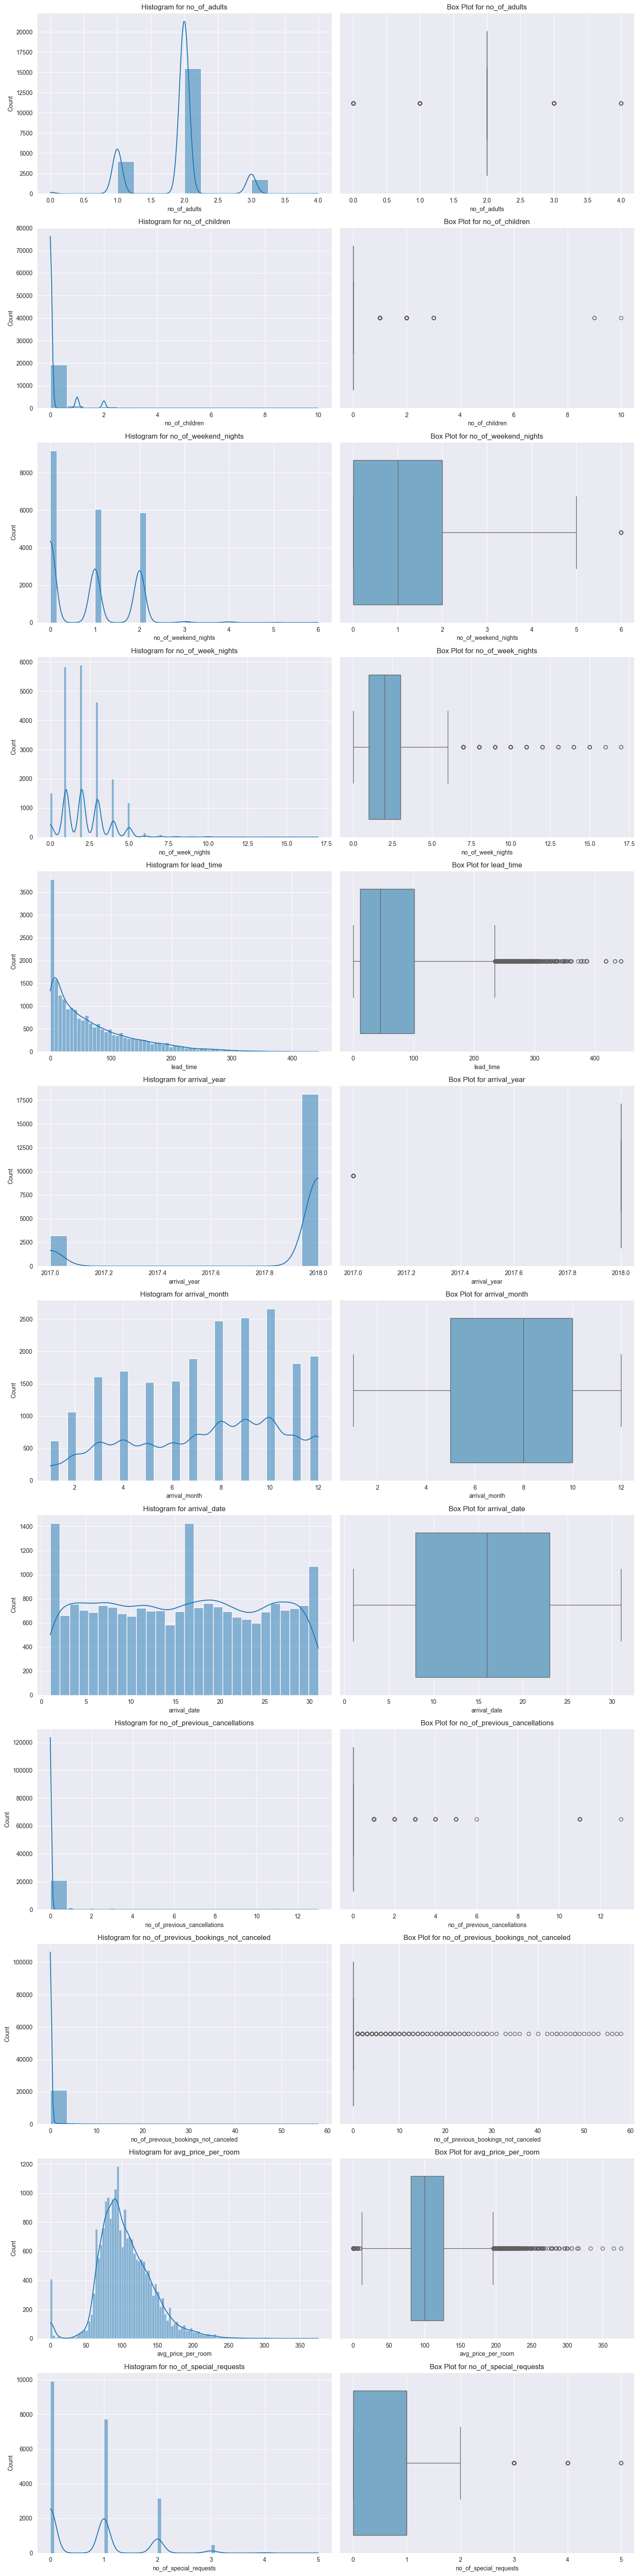

In [19]:
num_plot_dist(data , num_cols)

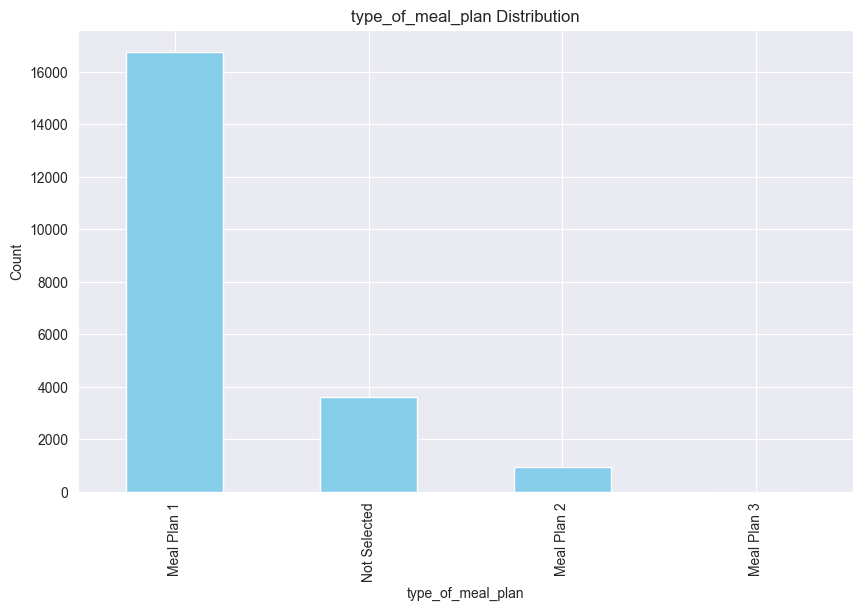

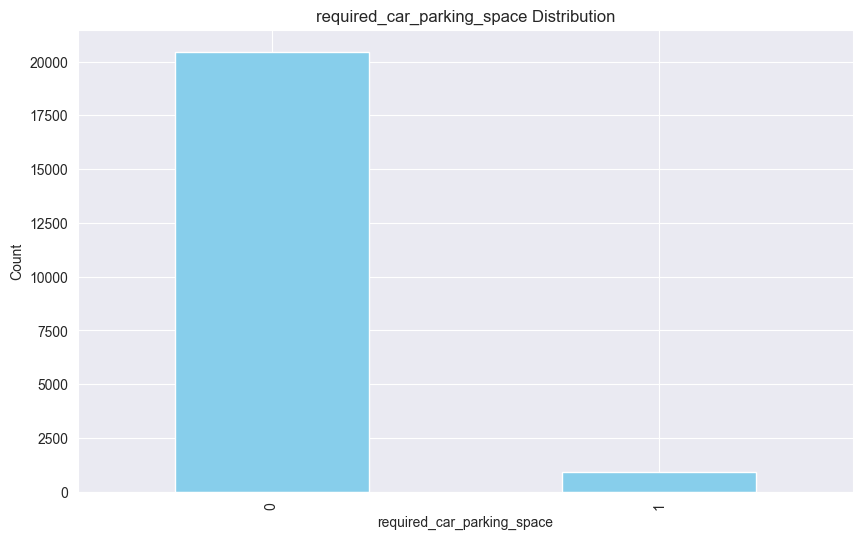

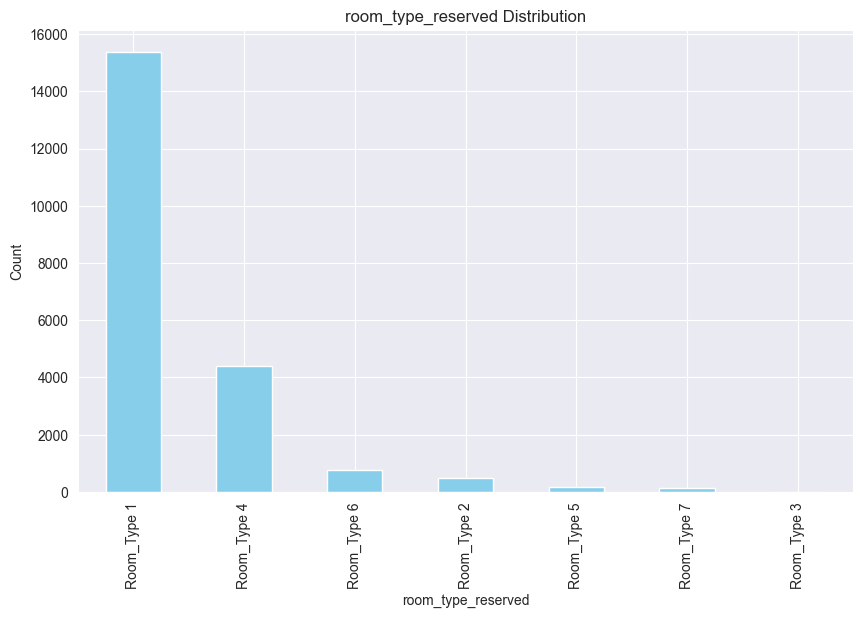

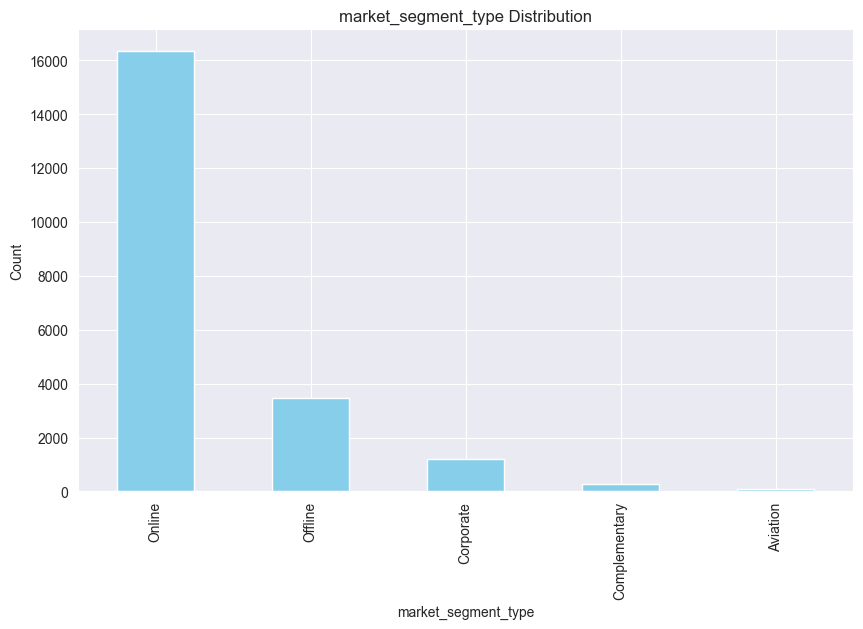

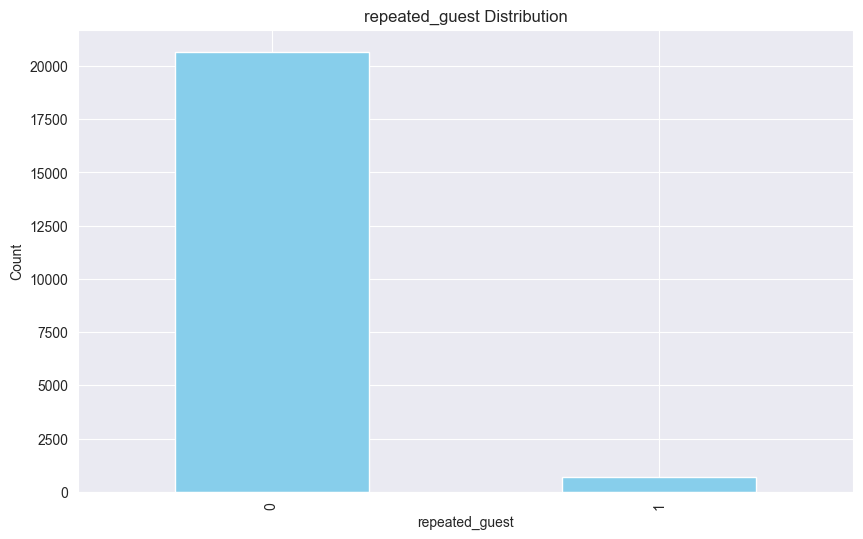

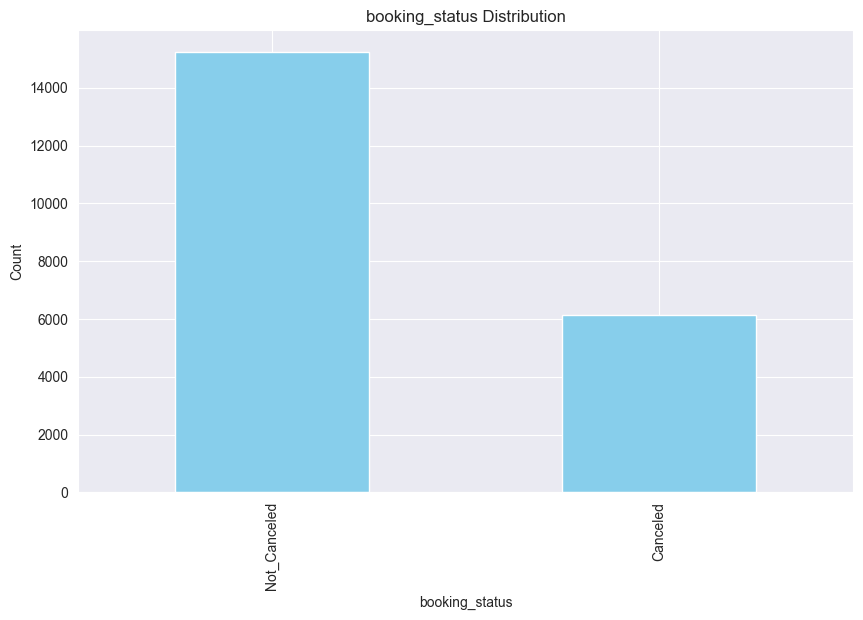

In [20]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

### Bivariate analysis

In [21]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

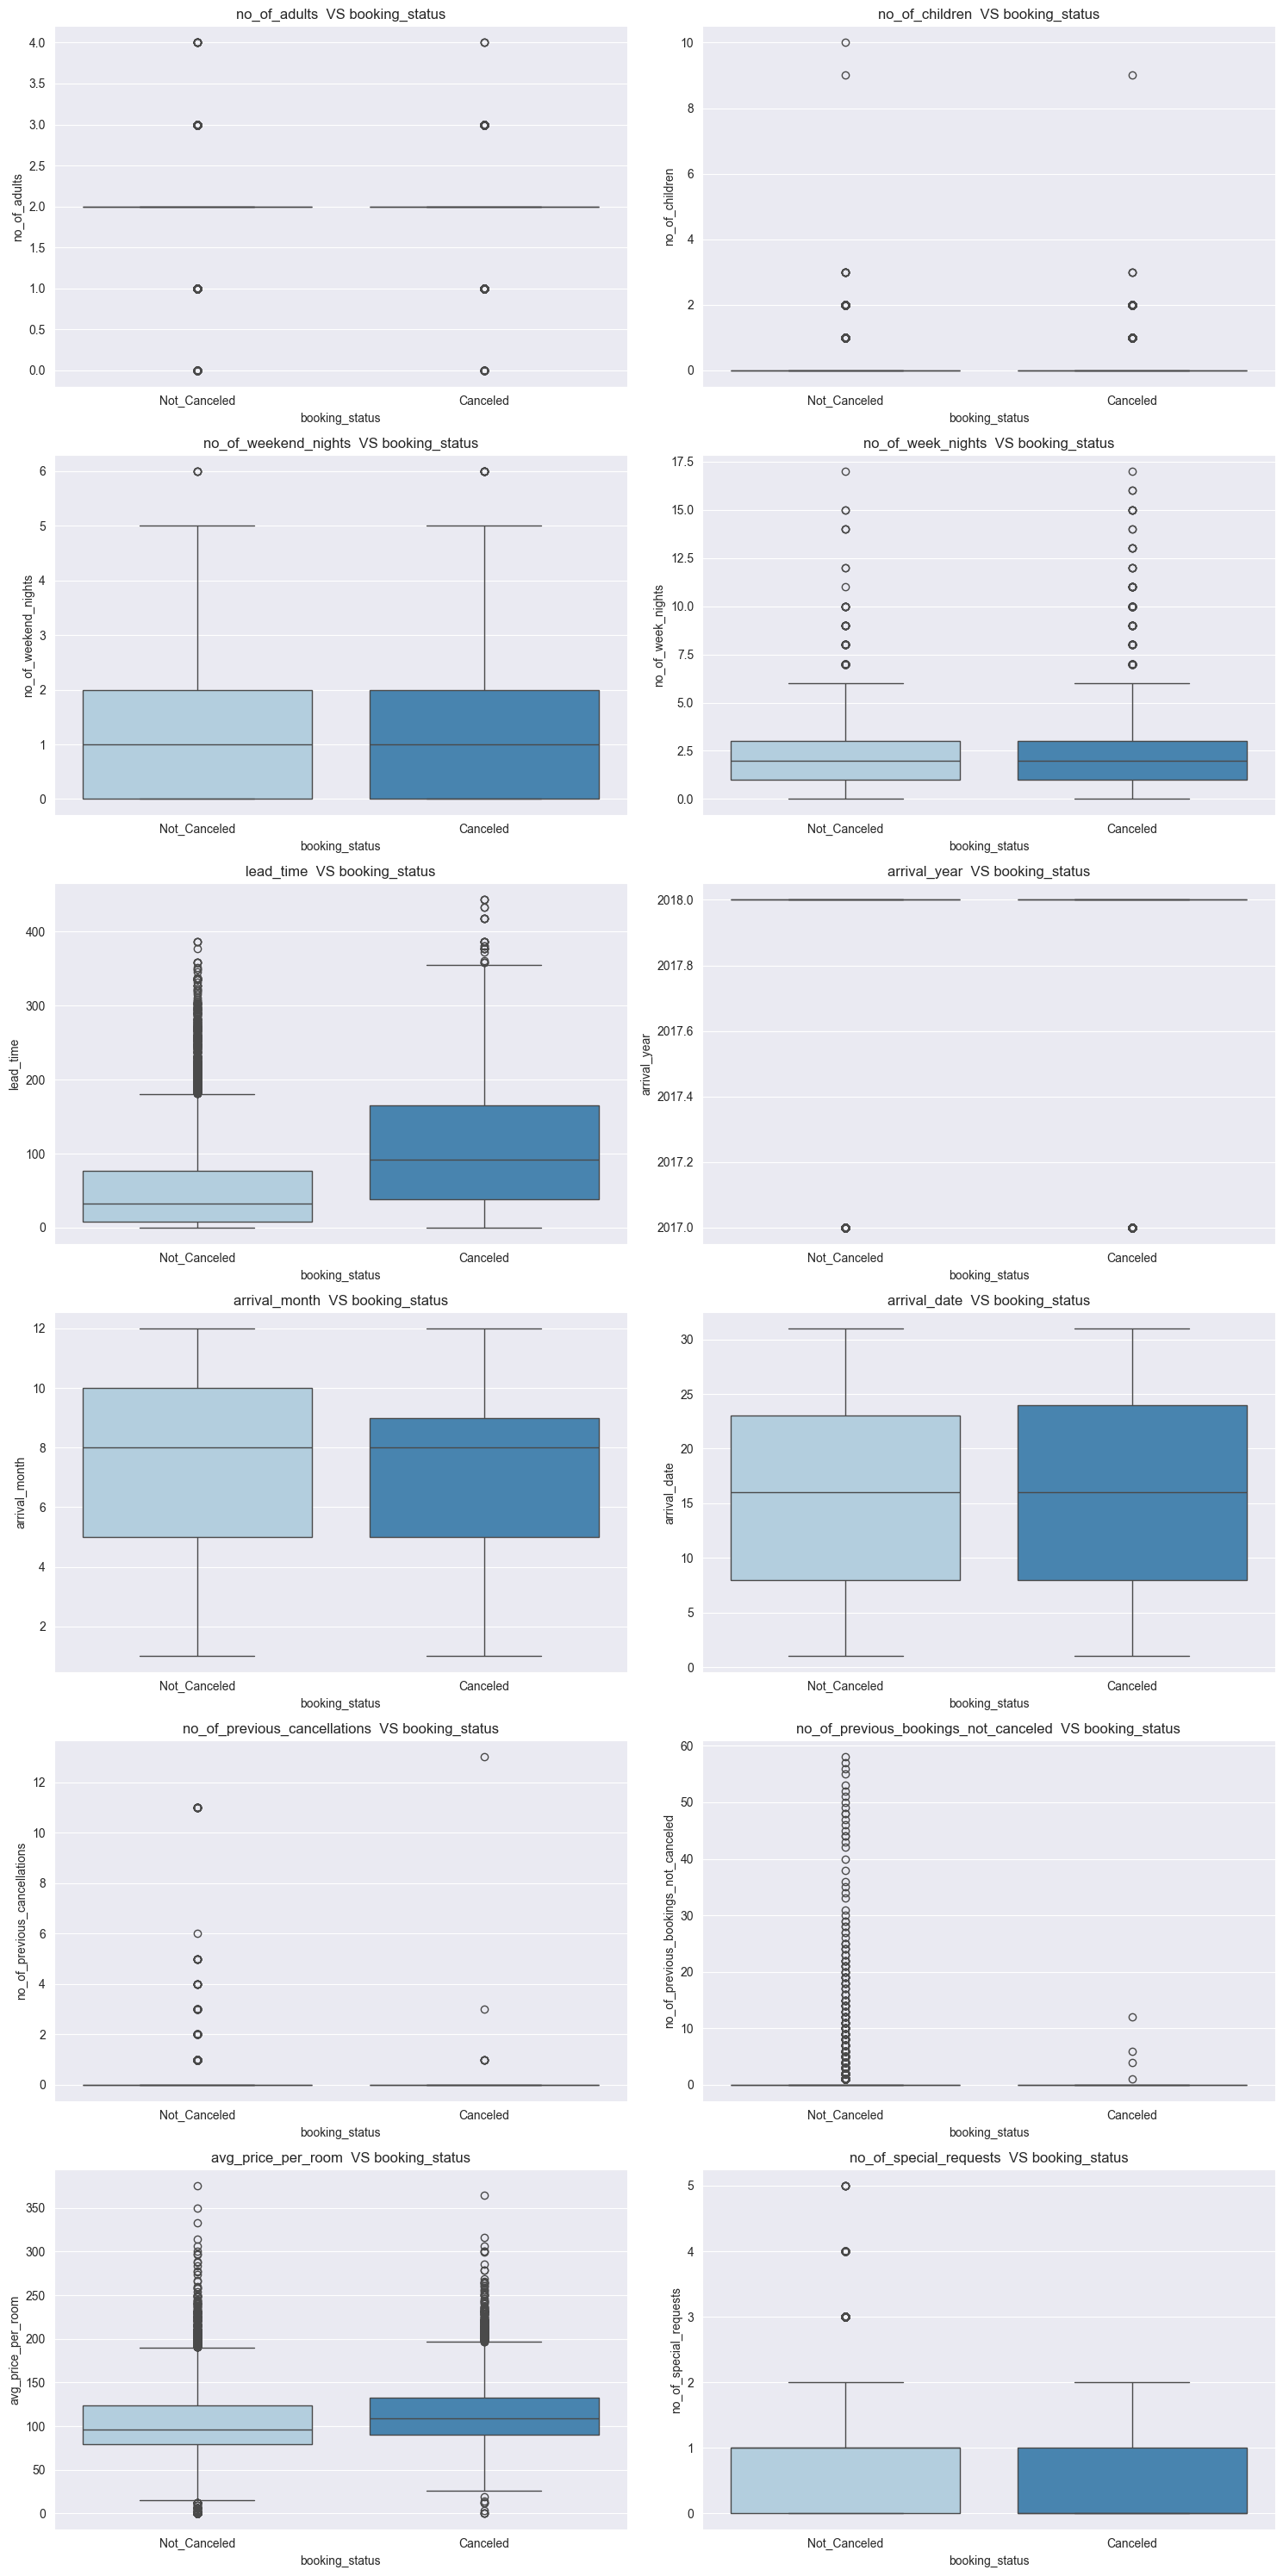

In [22]:
plot_bivariate_num(data , 'booking_status' , num_cols)

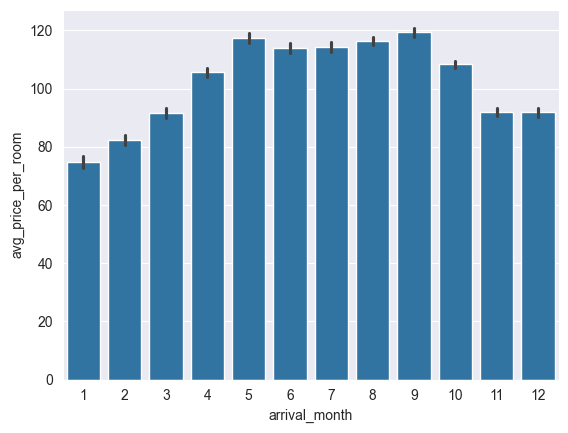

In [23]:
sns.barplot(x='arrival_month' , y="avg_price_per_room" , data=data)
plt.show()

In [24]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

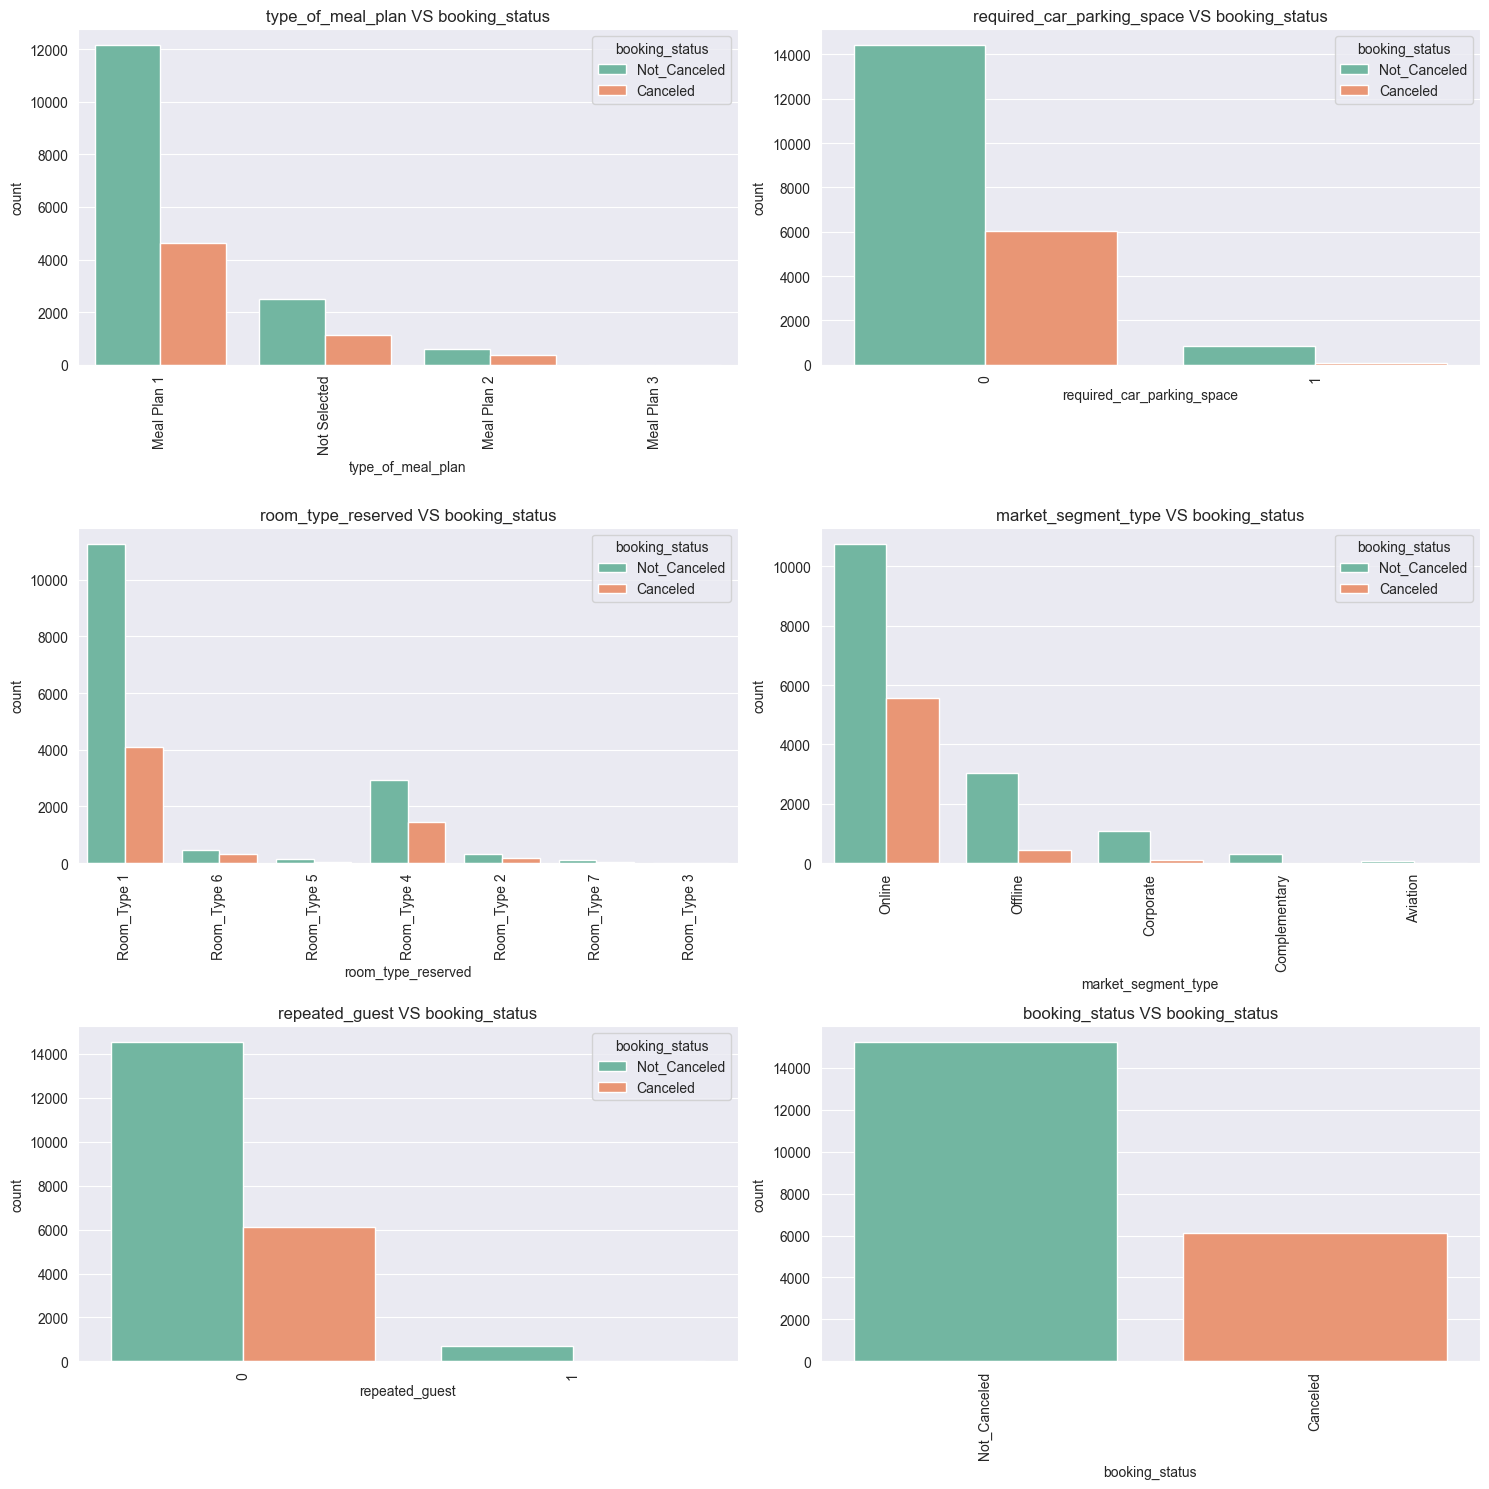

In [25]:
plot_bivaraite_cat(data , 'booking_status' , cat_cols)

### Data Processing

In [27]:
df.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.0,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.5,2,Not_Canceled


In [28]:
# Get the information about the table
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [29]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

In [30]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [32]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'required_car_parking_space': {0: 0, 1: 1},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'repeated_guest': {0: 0, 1: 1},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

### Multicollinearity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [34]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [35]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


From the above our data doesn't have any multi-collinearity.

In [38]:
corr = df.corr()

<Axes: >

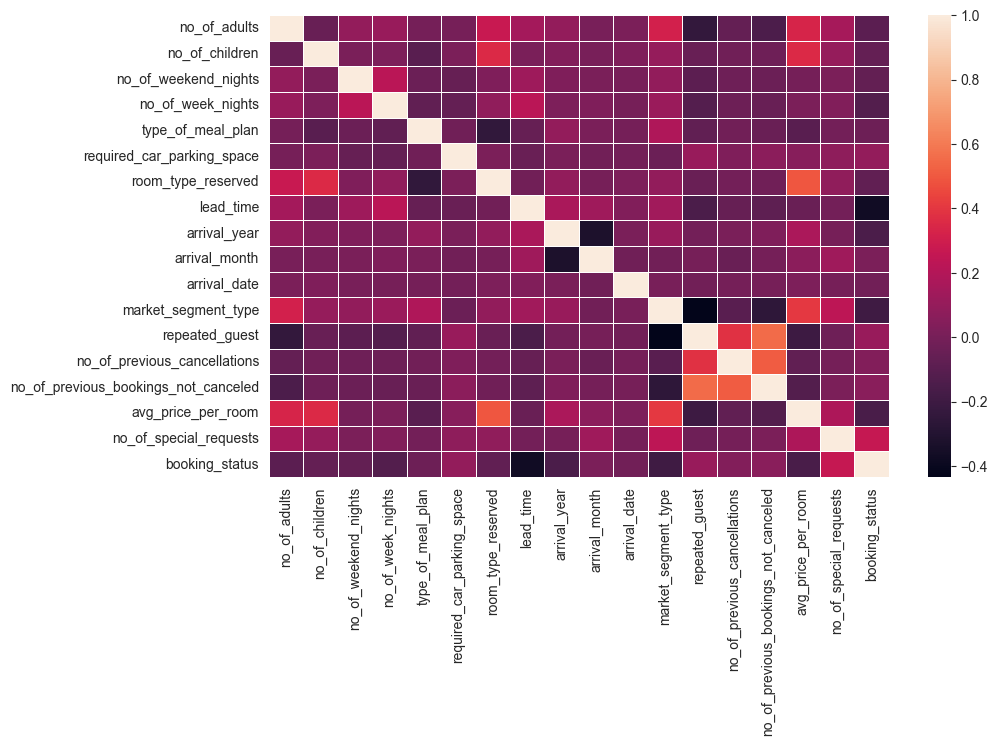

In [42]:
# Plot the correlation
plt.figure(figsize=(10,6))
sns.heatmap(corr, linewidth=0.5)

### Skewness

In [43]:
skewness = df.skew()

In [44]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

### Imbalanced dataset

In [45]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

This is clearly the case of imbalanced dataset.

In [49]:
# Define X and y, before we proceed further
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [47]:
from imblearn.over_sampling import SMOTE

In [50]:
# Check the length of X and y for the sanity
len(X), len(y)

(21359, 21359)

In [51]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X,y)

In [52]:
# Let's check for the value counts of y
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

As we see above, the values are equal now.

In [53]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

Now we assign these values to the dataframe.

In [54]:
df = balanced_df.copy()

Let's check for the feature selection

In [55]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [57]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

Before choosing the main model, let's see which are the most contributing features to the model.

In [58]:
feature_importance = model.feature_importances_

In [62]:
feature_importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": feature_importance
})

In [63]:
top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

In [66]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [67]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [69]:
len(top_10_df.columns)

11

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [71]:
df.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.0,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.5,2,1


In [72]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBooost": XGBClassifier(random_state=42),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42)
}

In [77]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [84]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [85]:
metrics

{'Model': ['Random Forest',
  'Logistic Regression',
  'Gradient Boosting',
  'Support Vector Classifier',
  'Decision Tree',
  'KNN',
  'Naive Bayes',
  'XGBooost',
  'Adaboost',
  'LGBM'],
 'Accuracy': [0.8962744132611193,
  0.7879533891350731,
  0.843426883308715,
  0.6656819300837026,
  0.8490070572788446,
  0.7800754964713605,
  0.5770556376169375,
  0.8854423108485147,
  0.7996061053668144,
  0.8759231905465288],
 'Precision': [0.8968098958333334,
  0.7945659377070908,
  0.8279603223806572,
  0.641390637831919,
  0.8604963112005366,
  0.8583264291632146,
  0.9060955518945635,
  0.8818415969092079,
  0.8084751418084751,
  0.863607793840352],
 'Recall': [0.8973941368078175,
  0.7811074918566775,
  0.8700325732899022,
  0.7631921824104234,
  0.8358306188925081,
  0.6749185667752443,
  0.1791530944625407,
  0.8921824104234528,
  0.7892508143322475,
  0.895114006514658],
 'F1 Score': [0.8971019211983068,
  0.7877792378449409,
  0.8484752223634053,
  0.6970102632753236,
  0.84798413747

In [86]:
# Convert the above result into the dataframe
metrics_df = pd.DataFrame(metrics)

In [87]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.896274,0.896810,0.897394,0.897102
1,Logistic Regression,0.787953,0.794566,0.781107,0.787779
2,Gradient Boosting,0.843427,0.827960,0.870033,0.848475
3,Support Vector Classifier,0.665682,0.641391,0.763192,0.697010
4,Decision Tree,0.849007,0.860496,0.835831,0.847984
5,KNN,0.780075,0.858326,0.674919,0.755653
6,Naive Bayes,0.577056,0.906096,0.179153,0.299157
7,XGBooost,0.885442,0.881842,0.892182,0.886982
8,Adaboost,0.799606,0.808475,0.789251,0.798747
9,LGBM,0.875923,0.863608,0.895114,0.879079


Let's train our Random Forest model

Now we will train our RF model.

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [89]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [90]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [92]:
rf = RandomForestClassifier(random_state=42)

In [93]:
params_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(10, 50),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "bootstrap": [True, False]
}

In [94]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring="accuracy"
)

In [95]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   6.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   6.2s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002324BABAA80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023249A651C0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002324B9456A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002324B94E180>},
                   random_state=42, scoring='accuracy', verbose=2)

In [96]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [97]:
# Let's assign the best params to the model
best_rf_model = random_search.best_estimator_

In [98]:
y_pred = best_rf_model.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [100]:
# Let's check for the accuracy score and other things
print(f"Accuracy of model is: {accuracy}")
print(f"Precision of model is:{precision} ")
print(f"Recall of model is:{recall} ")
print(f"F1 Score of model is:{f1}")

Accuracy of model is: 0.8957820449696373
Precision of model is:0.8911018310311597 
Recall of model is:0.9035830618892509 
F1 Score of model is:0.8972990457706614


Now we save the model.

In [101]:
import joblib

In [102]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [103]:
# Now we load the model
loaded_model = joblib.load("random_forest.pkl")

Let's make a dataframe for our loaded model to test on some data

In [104]:
X_train[0:1]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
4157,2,0,2,5,0,0,0,190,2017,9,8,4,0.0,0.0,0.0,93.5,1


In [108]:
(X_train[0:1]).shape

(1, 17)